# Project 1: SAT & ACT Analysis

*Author: Grace Campbell*

## Problem Statement

The SAT and ACT are the two most widely-administered standardized tests in the United States used to help universities make admissions decisions about incoming students. Across the 50 states, there is a wide range of average participation rates for both tests. Which states are lacking the most in test participation, and what actions can be taken to increase participation in these states?

### Contents:
- [2017 Data Import and Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization and Descriptive Statistics](#Data-Visualization-and-Descriptive-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

## 2017 Data Import and Cleaning

In [3]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

Here is a quick overview of our two datasets from 2017:

In [4]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


For the SAT, the maximum possible value is 1600, with maximum values of 800 for each subtest.

For the ACT, the scores range from 1 to 36, and each subtest is graded on the same scale.

In [6]:
# Getting a summary of the dataframes:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [7]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


The data shows scores and participation rates for the SAT and ACT in each state. The scores are broken down into their respective sections for each test. The SAT has 5 columns, and the ACT has 7. This appears to be because the ACT has more subtests than the SAT. The ACT data also has one more row than the SAT because it has a row named "National." My data appears to be complete, as no columns have any empty or missing values. 

The "Participation" data are all stored as objects because they are strings with a '%'. The ACT composite scores are also stored as objects, which is strange because they appear to be floats at first glance. The SAT scores are all integers. 

Below I will convert all numeric columns to floats in order to more easily examine the data:

In [8]:
sat_2017['Participation'] = sat_2017['Participation'].apply(lambda x: x.strip('%'))
sat_2017.iloc[:, 1:] = sat_2017.iloc[:, 1:].astype(float)

There was one cell in the ACT data that was entered incorrectly as "20.2x" instead of "20.2". The cell below manually fixes this cell so that it can be turned into a float.

In [9]:
act_2017.iloc[51, 6] = 20.2

In [10]:
act_2017['Participation'] = act_2017['Participation'].apply(lambda x: x.strip('%'))
act_2017.iloc[:, 1:] = act_2017.iloc[:, 1:].astype(float)

My new converted data:

In [11]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593.0,572.0,1165.0
1,Alaska,38.0,547.0,533.0,1080.0
2,Arizona,30.0,563.0,553.0,1116.0
3,Arkansas,3.0,614.0,594.0,1208.0
4,California,53.0,531.0,524.0,1055.0


In [12]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [13]:
# Checking the datatypes to confirm it worked properly:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

In [14]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

Because I will be combining these two dataframes with each other, and with the data from 2018, I want to rename the columns in each dataframe to be more descriptive. I will add the test name and the year to each column name (except `'state'`):

In [15]:
sat_2017.columns = ['state', 'sat_participation_17', 'sat_reading_writing_17', 'sat_math_17', 'sat_total_17']
act_2017.columns = ['state', 'act_participation_17', 'act_english_17', 'act_math_17', 'act_reading_17', 
                    'act_science_17', 'act_composite_17']

### Data Dictionary

Here is a data dictionary which clearly outlines the meaning of the data in each column:

|Feature*|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|SAT/ACT|The state from which the scores have been taken|
|**sat_participation**|*float*|SAT|Total statewide SAT participation, as a percentage (62.0 would mean 62%, etc.)|
|**sat_reading_writing**|*float*|SAT|The average statewide score for the Evidence-Based Reading and Writing subtest of the SAT (out of 800)|
|**sat_math**|*float*|SAT|The average statewide score for the Math subtest of the SAT (out of 800)|
|**sat_total**|*float*|SAT|The average statewide total SAT score (sum of the two subtest scores, out of 1600 total)|
|**act_participation**|*float*|ACT|Total statewide ACT participation, as a percentage (62.0 would mean 62%, etc.)|
|**act_english**|*float*|ACT|The average statewide score for the English subtest of the ACT (out of 36)|
|**act_math**|*float*|ACT|The average statewide score for the Math subtest of the ACT (out of 36)|
|**act_reading**|*float*|ACT|The average statewide score for the Reading subtest of the ACT (out of 36)|
|**act_science**|*float*|ACT|The average statewide score for the Science subtest of the ACT (out of 36)|
|**act_composite**|*float*|ACT|The average statewide composite ACT score (the average of all subtest scores, out of 36)|
||||**All column names will have `_17` or `_18` at the end to denote from which year the scores were taken.*|

Here I will drop the `'National'` row of the ACT dataframe:

In [16]:
act_2017.drop(act_2017[act_2017.state == 'National'].index, inplace=True)

Finally, I will merge the SAT and ACT 2017 dataframes and save the combined dataframe to a .csv file:

In [17]:
combined_2017 = pd.merge(left=sat_2017, right=act_2017, on='state')
combined_2017.head()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,22.8


In [18]:
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

In [19]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

Here is an overview of the 2018 datasets:

In [20]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Minnesota,4%,643,655,1298
1,Wisconsin,3%,641,653,1294
2,North Dakota,2%,640,643,1283
3,Iowa,3%,634,631,1265
4,Kansas,4%,633,631,1265


In [21]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [22]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [23]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
State            52 non-null object
Participation    52 non-null object
Composite        52 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


As with the 2017 datasets, we have no missing data. However, unlike the ACT 2017 data, the ACT 2018 data does not have columns for the subtests. We only have data for participation and composite scores for each state.

Once again, I must cast all numeric columns as `float` type so that I can more easily manipulate the data:

In [24]:
sat_2018['Participation'] = sat_2018['Participation'].apply(lambda x: x.strip('%'))
sat_2018.iloc[:, 1:] = sat_2018.iloc[:, 1:].astype(float)

In [25]:
act_2018['Participation'] = act_2018['Participation'].apply(lambda x: x.strip('%'))
act_2018.iloc[:, 1:] = act_2018.iloc[:, 1:].astype(float)

In [26]:
# Confirming that it worked properly
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

In [27]:
act_2018.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

As with the 2017 data, I need to rename the columns to be more descriptive:

In [28]:
sat_2018.columns = ['state', 'sat_participation_18', 'sat_reading_writing_18', 'sat_math_18', 'sat_total_18']
act_2018.columns = ['state', 'act_participation_18', 'act_composite_18']

Finally, I will combine the 2018 SAT and ACT data, and combine that with the 2017 data into one dataframe named `final`. I will then save the final dataframe as a .csv file.

In [29]:
combined_2018 = pd.merge(left=sat_2018, right=act_2018, on='state')
final = pd.merge(left=combined_2017, right=combined_2018, on='state')
final.head()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595.0,571.0,1166.0,100.0,19.1
1,Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562.0,544.0,1106.0,33.0,20.8
2,Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577.0,572.0,1149.0,66.0,19.2
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592.0,576.0,1169.0,100.0,19.4
4,California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540.0,536.0,1076.0,27.0,22.7


In [30]:
final.to_csv('../data/final.csv')

## Exploratory Data Analysis

### Summary Statistics
I will use the `describe` method to look at the summary statistics of each feature in the dataframe.

In [31]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_17,48.0,40.020833,34.545985,2.0,4.000,40.50,65.500,100.0
sat_reading_writing_17,48.0,570.395833,43.969399,503.0,535.750,559.50,612.500,644.0
sat_math_17,48.0,548.687500,86.248073,52.0,523.750,549.50,597.000,651.0
sat_total_17,48.0,1129.000000,89.521185,996.0,1059.000,1107.50,1210.000,1295.0
act_participation_17,48.0,64.500000,31.992020,8.0,31.000,68.00,100.000,100.0
act_english_17,48.0,20.966667,2.313359,16.3,19.300,20.80,23.300,25.5
act_math_17,48.0,21.247917,1.933247,18.0,19.700,21.05,23.100,25.3
act_reading_17,48.0,22.060417,2.017238,18.1,20.500,21.85,24.125,26.0
act_science_17,48.0,21.066667,3.239473,2.3,19.975,21.30,22.525,24.9
act_composite_17,48.0,21.568750,1.977765,17.8,19.950,21.40,23.600,25.5


The first thing I notice from these statistics is the 50th percentile of participation rates for all tests. In 2017 the 50th percentile was 40.5, meaning that 50% of the data falls at 40.5 or lower. Practically, this means that half of the states had SAT participation rates of 40.5% or lower.

By contrast, ACT 2017 50th percentile for participation was 68%.

In 2018, the 50th percentile for the SAT was 53.5%, and for the ACT was 65.5%. SAT participation appears to have gone up from 2017 to 2018, while ACT participation has gone slightly down.

The 50th percentiles for total/composite scores from 2017 to 2018 seem relatively stable. The SAT total scores hover around 1100, and the ACT composite scores stay around 21. Given that these scores are 58% and 68%, respectively, of the tests' total scores, these figures are not terribly concerning.

## Investigating Trends

### Participation Rates

#### States with the highest and lowest participation rates for the 2017 SAT:

In [32]:
final[['state', 'sat_participation_17']].sort_values(by='sat_participation_17', ascending=False).head(3)

,state,sat_participation_17
21,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0


In [33]:
final[['state', 'sat_participation_17']].sort_values(by='sat_participation_17', ascending=False).tail()

,state,sat_participation_17
3,Arkansas,3.0
46,Wisconsin,3.0
47,Wyoming,3.0
32,North Dakota,2.0
14,Iowa,2.0


#### States with the highest and lowest participation rates for the 2018 SAT:

In [34]:
final[['state', 'sat_participation_18']].sort_values(by='sat_participation_18', ascending=False).head()

,state,sat_participation_18
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
21,Michigan,100.0
11,Idaho,100.0


In [35]:
final[['state', 'sat_participation_18']].sort_values(by='sat_participation_18', ascending=False).tail()

,state,sat_participation_18
38,South Dakota,3.0
14,Iowa,3.0
46,Wisconsin,3.0
47,Wyoming,3.0
32,North Dakota,2.0


Michigan, Connecticut, and Delaware all had participation rates of 100% for both the 2017 and the 2018 SAT. 

Wisconsin, Wyoming, North Dakota, and Iowa were all in the states with the lowest participation rates for both the 2017 and 2018 SAT.

#### States with the highest and lowest participation rates for the 2017 ACT:

In [36]:
final[['state', 'act_participation_17']].sort_values(by='act_participation_17', ascending=False).head(15)

,state,act_participation_17
0,Alabama,100.0
16,Kentucky,100.0
46,Wisconsin,100.0
41,Utah,100.0
39,Tennessee,100.0
37,South Carolina,100.0
31,North Carolina,100.0
26,Nevada,100.0
23,Missouri,100.0
22,Minnesota,100.0


In [37]:
final[['state', 'act_participation_17']].sort_values(by='act_participation_17', ascending=False).tail()

,state,act_participation_17
35,Pennsylvania,23.0
36,Rhode Island,21.0
27,New Hampshire,18.0
7,Delaware,18.0
18,Maine,8.0


#### States wtih the highest and lowest participation rates for the 2018 ACT:

In [38]:
final[['state', 'act_participation_18']].sort_values(by='act_participation_18', ascending=False).head(15)

,state,act_participation_18
0,Alabama,100.0
16,Kentucky,100.0
46,Wisconsin,100.0
41,Utah,100.0
39,Tennessee,100.0
37,South Carolina,100.0
33,Ohio,100.0
31,North Carolina,100.0
26,Nevada,100.0
25,Nebraska,100.0


In [39]:
final[['state', 'act_participation_18']].sort_values(by='act_participation_18', ascending=False).tail()

,state,act_participation_18
35,Pennsylvania,20.0
7,Delaware,17.0
27,New Hampshire,16.0
36,Rhode Island,15.0
18,Maine,7.0


13 states had participation rates of 100% for both the 2017 and 2018 ACT. Minnesota and Colorado both had 100% participation in 2017, but dropped below 100% in 2018.

Pennsylvania, Delaware, New Hampshire, Rhode Island, and Maine were in the bottom 5 lowest participation rates for the ACT both years. In fact, their participation rates all went down in 2018.

Overall, there seems to be more participation in the ACT than the SAT. There are more states with 100% participation rates in the ACT, and the lowest rates of ACT participation are higher than the lowest rates of SAT participation for all states.

#### Let's look at the relationship between SAT participation and ACT participation.

Here are SAT and ACT scores, sorting by highest SAT participation first, then by highest ACT participation.

In [40]:
final[['state', 'sat_participation_17', 'act_participation_17']].sort_values(by='sat_participation_17', ascending=False).head()

,state,sat_participation_17,act_participation_17
21,Michigan,100.0,29.0
6,Connecticut,100.0,31.0
7,Delaware,100.0,18.0
27,New Hampshire,96.0,18.0
18,Maine,95.0,8.0


In [41]:
final[['state', 'sat_participation_18', 'act_participation_18']].sort_values(by='sat_participation_18', ascending=False).head()

,state,sat_participation_18,act_participation_18
5,Colorado,100.0,30.0
6,Connecticut,100.0,26.0
7,Delaware,100.0,17.0
21,Michigan,100.0,22.0
11,Idaho,100.0,36.0


In [42]:
final[['state', 'sat_participation_17', 'act_participation_17']].sort_values(by='act_participation_17', ascending=False).head()

,state,sat_participation_17,act_participation_17
0,Alabama,5.0,100.0
16,Kentucky,4.0,100.0
46,Wisconsin,3.0,100.0
41,Utah,3.0,100.0
39,Tennessee,5.0,100.0


In [43]:
final[['state', 'sat_participation_18', 'act_participation_18']].sort_values(by='act_participation_18', ascending=False).head()

,state,sat_participation_18,act_participation_18
0,Alabama,6.0,100.0
16,Kentucky,4.0,100.0
46,Wisconsin,3.0,100.0
41,Utah,4.0,100.0
39,Tennessee,6.0,100.0


As we can see, for both years, there appears to be an inverse relationship between the SAT and ACT. States with high SAT participation rates have lower ACT participation rates, and vice versa.

Let's see if any states have higher than 50% participation for both tests.

In [44]:
final.loc[(final['act_participation_17'] > 50)
          & (final['sat_participation_17'] > 50), 'state']

8     Florida
9     Georgia
10     Hawaii
Name: state, dtype: object

In [45]:
final.loc[(final['act_participation_18'] > 50)
          & (final['sat_participation_18'] > 50), 'state']

8            Florida
9            Georgia
10            Hawaii
31    North Carolina
37    South Carolina
Name: state, dtype: object

Florida, Georgia, and Hawaii had over 50% participation for both tests in 2017 and 2018. In 2018, North Carolina and South Carolina joined them.

### Total Scores

Now let's investigate which states have the highest scores for these tests.

#### We'll start by looking at the states with the highest and lowest scores for the SAT.

In [46]:
final[['state', 'sat_total_17']].sort_values(by='sat_total_17', ascending=False).head()

,state,sat_total_17
22,Minnesota,1295.0
46,Wisconsin,1291.0
14,Iowa,1275.0
23,Missouri,1271.0
15,Kansas,1260.0


In [47]:
final[['state', 'sat_total_17']].sort_values(by='sat_total_17', ascending=False).tail()

,state,sat_total_17
8,Florida,1017.0
18,Maine,1012.0
11,Idaho,1005.0
21,Michigan,1005.0
7,Delaware,996.0


In [48]:
final[['state', 'sat_total_18']].sort_values(by='sat_total_18', ascending=False).head()

,state,sat_total_18
22,Minnesota,1298.0
46,Wisconsin,1294.0
32,North Dakota,1283.0
14,Iowa,1265.0
15,Kansas,1265.0


In [49]:
final[['state', 'sat_total_18']].sort_values(by='sat_total_18', ascending=False).tail()

,state,sat_total_18
41,Utah,1010.0
10,Hawaii,1010.0
11,Idaho,1001.0
45,West Virginia,999.0
7,Delaware,998.0


Minnesota and Wisconsin took first and second place, respectively, both years. Iowa and Kansas also placed in the top 5 both years. 

Delaware had the very lowest average SAT score both years. Idaho was also in the bottom 5 both years.

#### States with the highest and lowest scores for the ACT:

In [50]:
final[['state', 'act_composite_17']].sort_values(by='act_composite_17', ascending=False).head()

,state,act_composite_17
27,New Hampshire,25.5
20,Massachusetts,25.4
6,Connecticut,25.2
18,Maine,24.3
30,New York,24.2


In [51]:
final[['state', 'act_composite_17']].sort_values(by='act_composite_17', ascending=False).tail()

,state,act_composite_17
0,Alabama,19.2
31,North Carolina,19.1
10,Hawaii,19.0
37,South Carolina,18.7
26,Nevada,17.8


In [52]:
final[['state', 'act_composite_18']].sort_values(by='act_composite_18', ascending=False).head()

,state,act_composite_18
6,Connecticut,25.6
20,Massachusetts,25.5
27,New Hampshire,25.1
30,New York,24.5
36,Rhode Island,24.2


In [53]:
final[['state', 'act_composite_18']].sort_values(by='act_composite_18', ascending=False).tail()

,state,act_composite_18
31,North Carolina,19.1
0,Alabama,19.1
10,Hawaii,18.9
37,South Carolina,18.3
26,Nevada,17.7


New Hampshire, Massachusetts, Connecticut, and New York were in the top 5 highest scores for 2017 and 2018. Alabama, North Carolina, Hawaii, South Carolina, and Nevada all had the lowest ACT scores both years.

## Data Visualization and Descriptive Statistics

### Heatmap of correlations

Here I will plot a heatmap of the correlations between all features in the dataframe using `seaborn`.

The `.corr()` method calculates the Pearson correlation coefficient for each variable with one another. The correlation coefficient is on a scale from $-1$ to $1$. The further away the correlation coefficient is from $0$ in either direction, the more correlated the two variables are. If it is close to $-1$, the variables are negatively correlated (i.e. when one goes up, the other goes down). If it is close to $1$, the variables are positively correlated (i.e. both variables go up or down together).

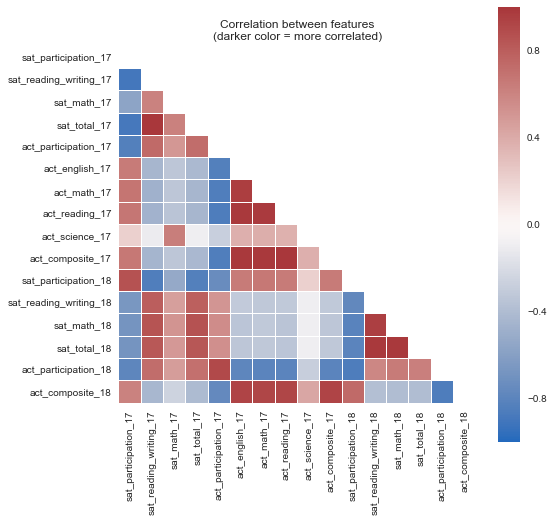

In [54]:
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,8))
with sns.axes_style("white"):
    ax = sns.heatmap(final.corr(), mask=mask, cmap='vlag', linewidths=0.01, vmin=-1, vmax=1, square=True)

ax.set_title('Correlation between features\n(darker color = more correlated)');

Not surprisingly, the subtest columns have strong positive correlations with the total/composite columns for both tests. What is strange, however, is that the participation scores and the total/composite scores appear to be negatively correlated for both tests. I would not expect there to be any correlation between participation and total/composite score, and certainly not a negative correlation. This could be due to the small sample size; we only have two years of data in our dataset.

### Histograms

Here we will look at histograms of participation rates for the SAT and ACT:

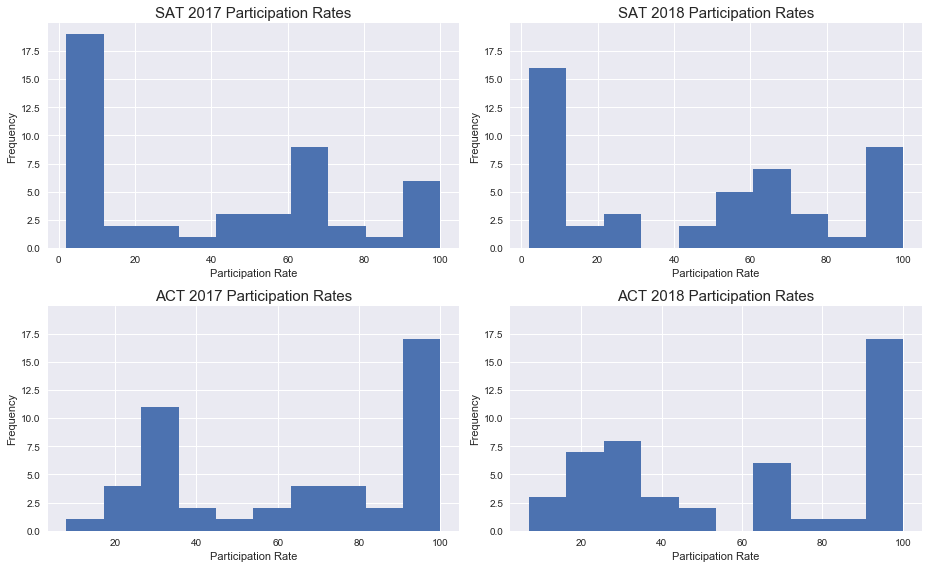

In [55]:
plt.figure(figsize=(13, 8))

ax1 = plt.subplot(221)
ax1.hist(final['sat_participation_17'])
ax1.set_xlabel('Participation Rate')
ax1.set_ylabel('Frequency')
ax1.set_title('SAT 2017 Participation Rates', fontsize=15)

ax2 = plt.subplot(222, sharey=ax1)
ax2.hist(final['sat_participation_18'])
ax2.set_xlabel('Participation Rate')
ax2.set_ylabel('Frequency')
ax2.set_title('SAT 2018 Participation Rates', fontsize=15)

ax3 = plt.subplot(223, sharey=ax1)
ax3.hist(final['act_participation_17'])
ax3.set_xlabel('Participation Rate')
ax3.set_ylabel('Frequency')
ax3.set_title('ACT 2017 Participation Rates', fontsize=15)

ax4 = plt.subplot(224, sharey=ax1)
ax4.hist(final['act_participation_18'])
ax4.set_xlabel('Participation Rate')
ax4.set_ylabel('Frequency')
ax4.set_title('ACT 2018 Participation Rates', fontsize=15)

plt.tight_layout();

As we can see, the SAT has a more right-skewed distribution of participation rates, meaning more states have lower participation rates than high participation rates. The opposite is true for the ACT: more states have higher participation rates than lower participation rates.

Now let's look at histograms of math scores for both tests:

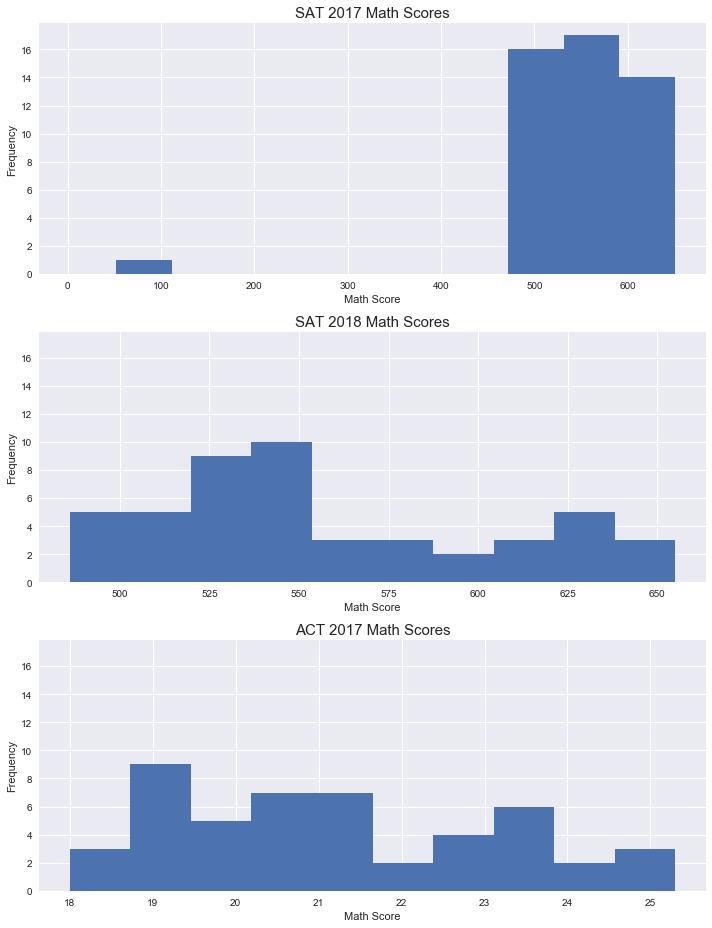

In [56]:
plt.figure(figsize=(10, 13))

ax1 = plt.subplot(311, sharex=ax2)
ax1.hist(final['sat_math_17'])
ax1.set_xlabel('Math Score')
ax1.set_ylabel('Frequency')
ax1.set_title('SAT 2017 Math Scores', fontsize=15)

ax2 = plt.subplot(312, sharey=ax1)
ax2.hist(final['sat_math_18'])
ax2.set_xlabel('Math Score')
ax2.set_ylabel('Frequency')
ax2.set_title('SAT 2018 Math Scores', fontsize=15)

ax3 = plt.subplot(313, sharey=ax1)
ax3.hist(final['act_math_17'])
ax3.set_xlabel('Math Score')
ax3.set_ylabel('Frequency')
ax3.set_title('ACT 2017 Math Scores', fontsize=15)

plt.tight_layout();

The 2017 SAT math score distribution is interesting. We see a high frequency of high math scores, with no scores in the mid-range. The SAT 2018 and ACT 2017 math scores are distributed similarly to one another. There is a spike in frequency at the mid-low range of scores, with frequency tapering off as we get to the higher scores.

Finally, we'll look at histograms of reading scores:

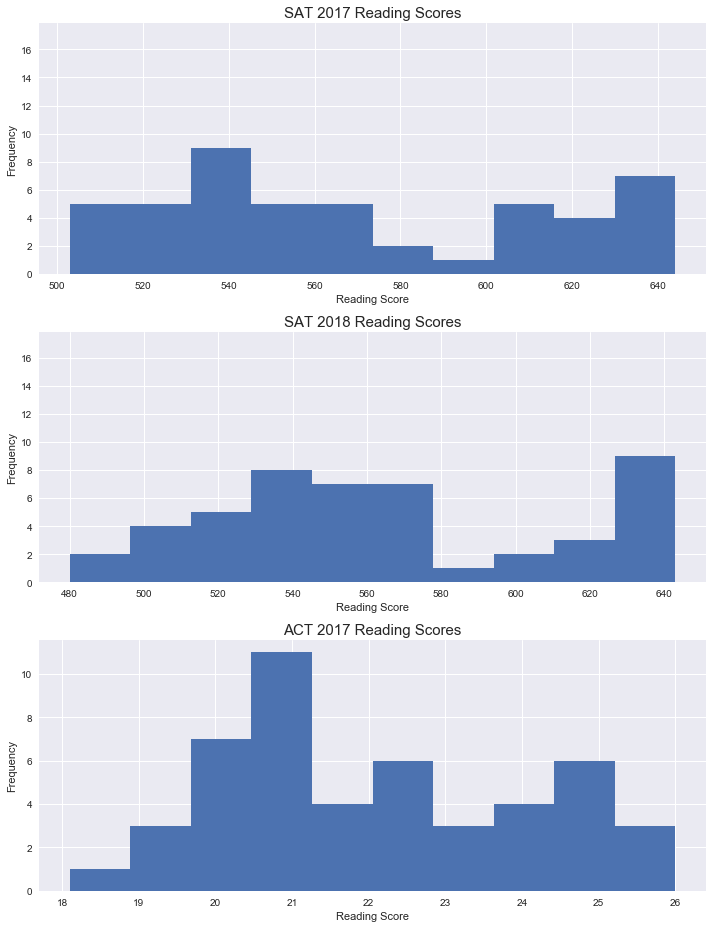

In [57]:
plt.figure(figsize=(10, 13))

ax1 = plt.subplot(311, sharey=ax3)
ax1.hist(final['sat_reading_writing_17'])
ax1.set_xlabel('Reading Score')
ax1.set_ylabel('Frequency')
ax1.set_title('SAT 2017 Reading Scores', fontsize=15)

ax2 = plt.subplot(312, sharey=ax3)
ax2.hist(final['sat_reading_writing_18'])
ax2.set_xlabel('Reading Score')
ax2.set_ylabel('Frequency')
ax2.set_title('SAT 2018 Reading Scores', fontsize=15)

ax3 = plt.subplot(313)
ax3.hist(final['act_reading_17'])
ax3.set_xlabel('Reading Score')
ax3.set_ylabel('Frequency')
ax3.set_title('ACT 2017 Reading Scores', fontsize=15)

plt.tight_layout();

Between 2017 and 2018, SAT scores increased overall, as we can see from the distribution of scores. There is a larger spike at the high end of the score range. The 2018 SAT and 2017 ACT reading scores are similarly distributed, with more scores in the low-mid range, but the 2017 SAT scores have a higher frequency of high scores.

### Scatterplots

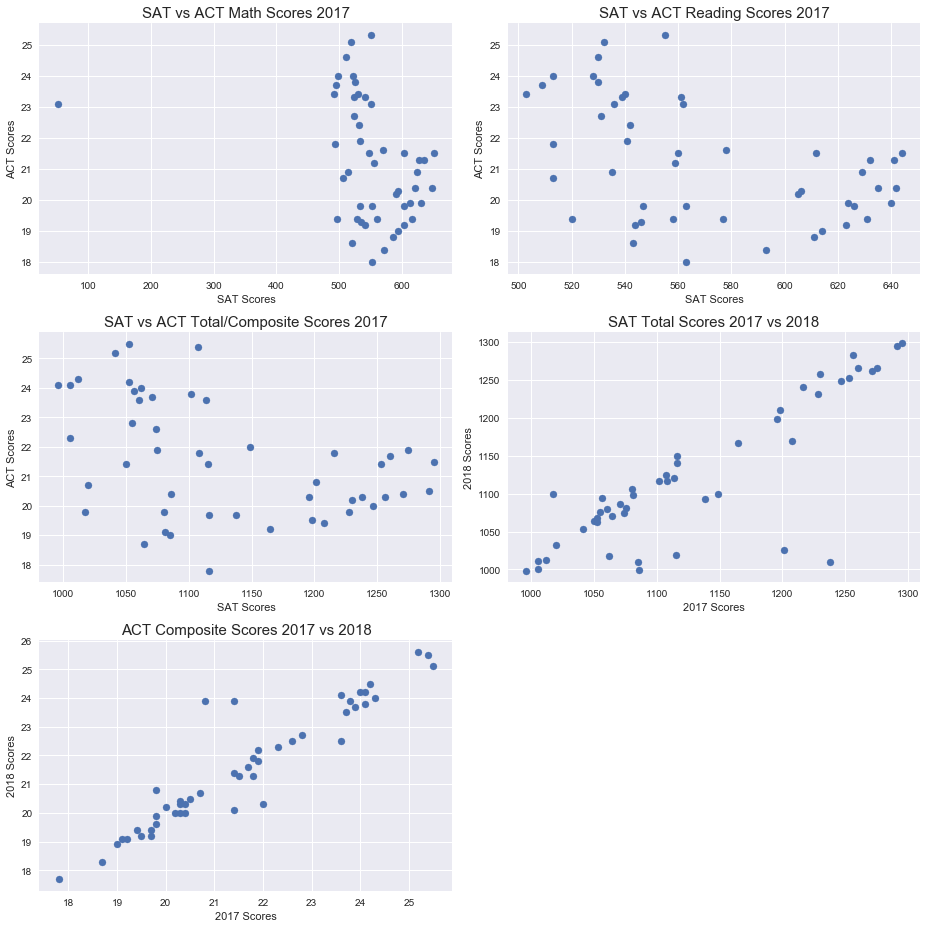

In [58]:
plt.figure(figsize=(13, 13))
ax1 = plt.subplot(321)
ax1.scatter(x=final['sat_math_17'], y=final['act_math_17'])
ax1.set_xlabel('SAT Scores')
ax1.set_ylabel('ACT Scores')
ax1.set_title('SAT vs ACT Math Scores 2017', fontsize=15);

ax2 = plt.subplot(322)
ax2.scatter(x=final['sat_reading_writing_17'], y=final['act_math_17'])
ax2.set_xlabel('SAT Scores')
ax2.set_ylabel('ACT Scores')
ax2.set_title('SAT vs ACT Reading Scores 2017', fontsize=15);

ax3 = plt.subplot(323) 
ax3.scatter(x=final['sat_total_17'], y=final['act_composite_17'])
ax3.set_xlabel('SAT Scores')
ax3.set_ylabel('ACT Scores')
ax3.set_title('SAT vs ACT Total/Composite Scores 2017', fontsize=15);

ax4 = plt.subplot(324)
ax4.scatter(x=final['sat_total_17'], y=final['sat_total_18'])
ax4.set_xlabel('2017 Scores')
ax4.set_ylabel('2018 Scores')
ax4.set_title('SAT Total Scores 2017 vs 2018', fontsize=15);

ax5 = plt.subplot(325)
ax5.scatter(x=final['act_composite_17'], y=final['act_composite_18'])
ax5.set_xlabel('2017 Scores')
ax5.set_ylabel('2018 Scores')
ax5.set_title('ACT Composite Scores 2017 vs 2018', fontsize=15);

plt.tight_layout()

There appears to be a direct positive correlation between SAT total scores in 2017 and 2018. There also seems to be a direct positive correlation between ACT composite scores in 2017 and 2018.

There appears to be a slight negative correlation between SAT and ACT scores in both reading and in total/composite. If a state has a higher average SAT score, then they are more likely to have a lower ACT score, and vice versa. This correlation is not very strong, but it may be something to note. The same does not hold true for math scores, however. This scatterplot does not appear to show any correlation between SAT and ACT math scores in 2017.

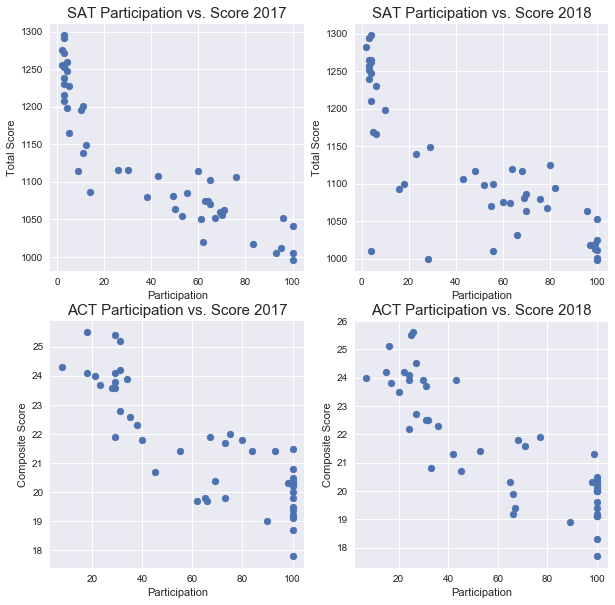

In [61]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(221)
ax1.scatter(x=final['sat_participation_17'], y=final['sat_total_17'])
ax1.set_xlabel('Participation')
ax1.set_ylabel('Total Score')
ax1.set_title('SAT Participation vs. Score 2017', fontsize=15);

ax2 = plt.subplot(222)
ax2.scatter(x=final['sat_participation_18'], y=final['sat_total_18'])
ax2.set_xlabel('Participation')
ax2.set_ylabel('Total Score')
ax2.set_title('SAT Participation vs. Score 2018', fontsize=15);

ax3 = plt.subplot(223)
ax3.scatter(x=final['act_participation_17'], y=final['act_composite_17'])
ax3.set_xlabel('Participation')
ax3.set_ylabel('Composite Score')
ax3.set_title('ACT Participation vs. Score 2017', fontsize=15);

ax4 = plt.subplot(224)
ax4.scatter(x=final['act_participation_18'], y=final['act_composite_18'])
ax4.set_xlabel('Participation')
ax4.set_ylabel('Composite Score')
ax4.set_title('ACT Participation vs. Score 2018', fontsize=15);


As we can see, there appears to be a negative correlation between participation and score for both the SAT and the ACT. This can be explained by the fact that some states require their students to take one or both of these tests. If all students in the state take the test, and the participation rate is 100%, then the average total/composite scores will be lower because it is more representative of the entire student population. If a test is not required by the state, then presumably only select students will take the test. These students will most likely be students that are well-prepared, and therefore earn better scores on the test.

### Boxplots

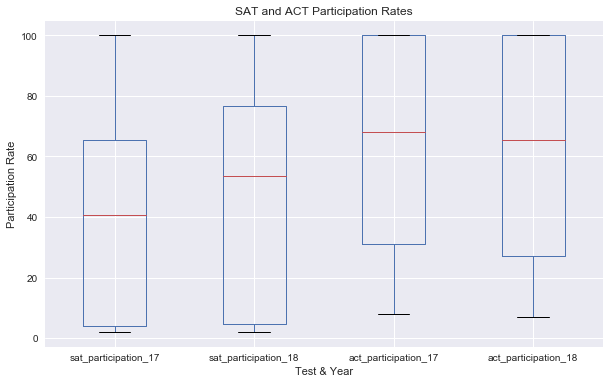

In [249]:
ax = final.loc[:, ['sat_participation_17', 'sat_participation_18', 
                   'act_participation_17', 'act_participation_18']].plot(kind='box', figsize=(10, 6))
ax.set_xlabel('Test & Year')
ax.set_ylabel('Participation Rate')
ax.set_title('SAT and ACT Participation Rates');

These boxplots give us information similar to that of the histograms; however, these boxplots show us even more clearly the skewness of the data. The SAT data's interquartile range (IQR) is much lower than that of the ACT data. We can also see that the third quartiles of the ACT data are equal to the maximum value. Similarly, the SAT's first quartile values are almost equal to the minimum value.

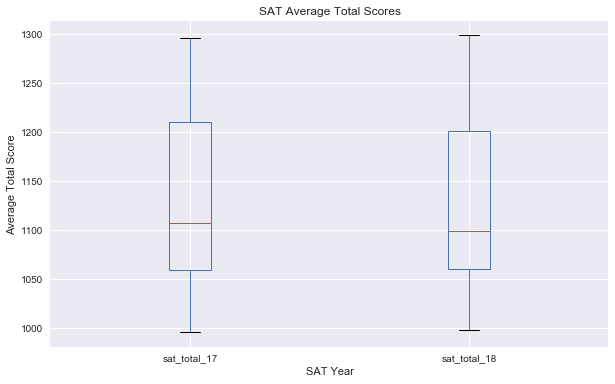

In [237]:
ax = final.loc[:, ['sat_total_17', 'sat_total_18']].plot(kind='box', figsize=(10, 6))
ax.set_xlabel('SAT Year')
ax.set_ylabel('Average Total Score')
ax.set_title('SAT Average Total Scores');

These data appear to be fairly normally distributed, with perhaps a slight skew to the right. While the IQR is centered in the data, the median is on the low end of the scale for both years.

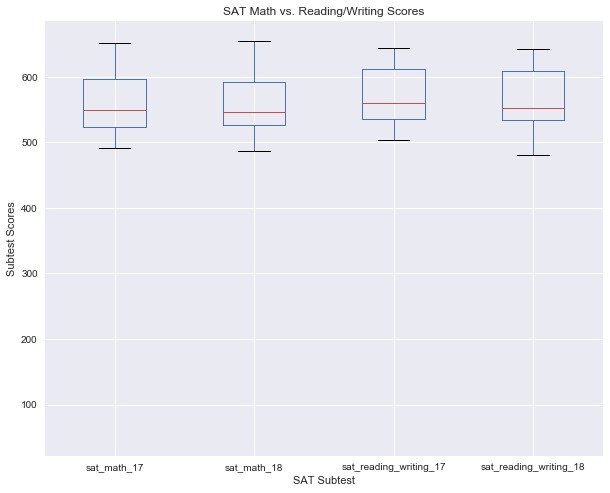

In [251]:
ax = final.loc[:, ['sat_math_17', 'sat_math_18', 'sat_reading_writing_17', 
                   'sat_reading_writing_18']].plot(kind='box', figsize=(10, 8))
ax.set_title('SAT Math vs. Reading/Writing Scores')
ax.set_xlabel('SAT Subtest')
ax.set_ylabel('Subtest Scores');

These boxplots show that the SAT subtests are also fairly normally distributed. There are no outliers and the "whiskers" of each respective plot are of similar length to one another.

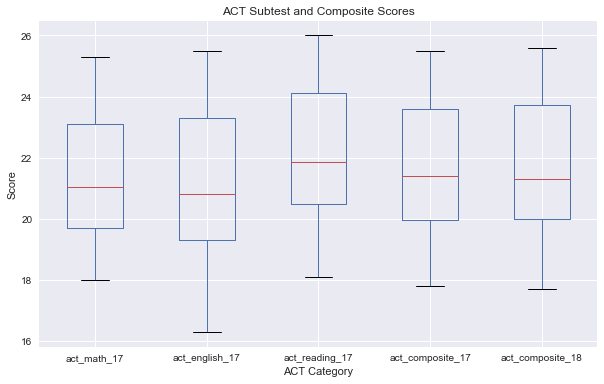

In [252]:
ax = final.loc[:, ['act_math_17', 'act_english_17', 'act_reading_17', 
                   'act_composite_17', 'act_composite_18']].plot(kind='box', figsize=(10, 6))
ax.set_title('ACT Subtest and Composite Scores')
ax.set_xlabel('ACT Category')
ax.set_ylabel('Score');

We can see from these plots that the ACT subtest data are also normally distributed. There are no outliers, and there does not appear to be any skewness.

## Outside Research

For my recommendations, I will focus on North Dakota, Wisconsin, and Wyoming:

In [267]:
final.iloc[[32, 46, 47], [0, 1, 5, 11, 15]]

,state,sat_participation_17,act_participation_17,sat_participation_18,act_participation_18
32,North Dakota,2.0,98.0,2.0,98.0
46,Wisconsin,3.0,100.0,3.0,100.0
47,Wyoming,3.0,100.0,3.0,100.0


North Dakota, Wyoming, and Wisconsin are three of a dozen states that require students to take the ACT before graduating. Because of this, each of these three states has a high participation rate for the ACT. However, the SAT participation rate for each of these states is quite low. Presumably, most students only take the ACT because it is required, and do not then take the SAT. As of the 2018-2019 school year, the fee to take the SAT is \$64.50 and the fee to take the ACT is \$62.50. It is reasonable to assume that many students in these states would not want to spend the money, time, and effort to take both tests when only the ACT is required.

## Conclusions and Recommendations

Based on my outside research, I would recommend several things to increase SAT participation in North Dakota, Wisconsin, and Wyoming. First, local school boards should designate one day during the school year in which students can sign up for and take the SAT through their high school. Making the test more accessible and convenient for students will increase participation. 

Secondly, there should be some sort of fee assistance offered for the SAT. If the students are more easily able to pay for the cost of taking the SAT, they may be more likely to take the test.

The third, and most comprehensive, recommendation is that these states make the SAT required for high school students. If the test is required, then participation will most certainly increase. However, this recommendation may not be the most reasonable. These states already require the ACT, so there may not be much incentive for them to require the SAT as well.

Overall, these states should encourage students to take both tests. Students may find that one test better demonstrates their skills than the other, and that they may score comparatively higher on one test than the other. A higher SAT or ACT test score means a higher chance of college admissions, and this point should be emphasized to all students to encourage them to take both tests.

## References

https://www.princetonreview.com/college/sat-information

https://www.testive.com/state-sat-act/

https://blog.collegeboard.org/how-much-does-sat-and-sat-subject-test-cost

https://www.testmasters.com/act/faq

https://blog.collegevine.com/should-you-take-both-the-sat-and-act/